# **Information Processing and Retrieval**

**Project developed by:**
- Diogo Fonte - up202004175
- Rodrigo Figueiredo - up202005216
- Sofia Rodrigo  - up202301429
- Vítor Cavaleiro - up202004724

## **Environment Setup**

In [1]:
import pandas as pd
import numpy as np
import os
import json

---

# Data Preparation

## Data Ingestion

### All The News - Collection of Articles from 18 publishers

In [2]:
# the original file is a .db file, which was exported as a json file using the sqlite studio

# get table with rows and columns
f = open("../data/all-the-news/all-the-news-conv.json", encoding="utf8")
data = json.load(f)
table = data["objects"][0]

# get rows and columns
columns = table["columns"]
rows = table["rows"]

# get column names
column_names = []
for column in columns:
    column_names.append(column["name"])

# Create resulting dictionary
result = {}
for column_name in column_names:
    result[column_name] = []

# get rows
for row in rows:
    for i in range(len(column_names)):
        result[column_names[i]].append(row[i])

pd.DataFrame.from_dict(result).to_csv('all_the_news.csv', encoding='utf-8')

In [3]:
all_the_news = pd.read_csv('all_the_news.csv', encoding='utf-8')
all_the_news.isna().sum()

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_18264\1132100165.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  all_the_news = pd.read_csv('all_the_news.csv', encoding='utf-8')


Unnamed: 0          0
id                  0
title               3
author          32400
date            12605
content         15403
year            12605
month           12605
publication      7715
category        35422
digital         11020
section        129563
url            105339
dtype: int64

In [4]:
all_the_news.head()

,Unnamed: 0,id,title,author,date,content,year,month,publication,category,digital,section,url
0,0,1,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
1,1,2,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
2,2,3,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
3,3,4,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
4,4,5,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN


In [5]:
# Drops irrelevant columns
all_the_news = all_the_news.drop(columns=['Unnamed: 0', 'id', 'year', 'month', 'digital'])
all_the_news = all_the_news.rename(columns={"publication": "publisher"})
all_the_news = all_the_news.rename(columns={"category": "source"})
all_the_news = all_the_news.rename(columns={"section": "category"})
all_the_news.head()

,title,author,date,content,publisher,source,category,url
0,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,Verge,Longform,NaN,NaN
1,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,Verge,Longform,NaN,NaN
2,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,Verge,Longform,NaN,NaN
3,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,Verge,Longform,NaN,NaN
4,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,Verge,Longform,NaN,NaN


In [6]:
rows_count = all_the_news.shape[0]
print("Number of rows: ", rows_count)

Number of rows:  204135


### BBC News

In [7]:
main_folder = "../data/bbc_news_collection/"
news = []

# Iterate through subfolders of the 5 categories (business, entertainment, politics, sport, tech)
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if filename.endswith(".txt"):
                with open(os.path.join(subfolder_path, filename), "r", encoding="utf-8") as file:
                    author = np.nan  # No author information
                    date = "2005-12-31"
                    lines = file.readlines()
                    title = lines[0].strip()  # Read the first line as the title
                    content = "".join(lines[1:]).replace("\n", " ").strip()  # Read the rest as content
                    publisher = "BBC"
                    category = subfolder
                    url = np.nan
                    source = "website"

                    aux = pd.DataFrame({"title": [title], "author": [author], "date": [date],
                                        "content": [content], "publisher": [publisher],  "source": [source],
                                        "category": [category], "url": [url]})
                    news.append(aux)

bbc_news = pd.concat(news, ignore_index=True)
bbc_news.to_csv("bbc_articles.csv", index=False)
bbc_news.head()

,title,author,date,content,publisher,source,category,url
0,Ad sales boost Time Warner profit,NaN,2005-12-31,Quarterly profits at US media giant TimeWarner...,BBC,website,business,NaN
1,Dollar gains on Greenspan speech,NaN,2005-12-31,The dollar has hit its highest level against t...,BBC,website,business,NaN
2,Yukos unit buyer faces loan claim,NaN,2005-12-31,The owners of embattled Russian oil giant Yuko...,BBC,website,business,NaN
3,High fuel prices hit BA's profits,NaN,2005-12-31,British Airways has blamed high fuel prices fo...,BBC,website,business,NaN
4,Pernod takeover talk lifts Domecq,NaN,2005-12-31,Shares in UK drinks and food firm Allied Domec...,BBC,website,business,NaN


In [8]:
rows_count_bbc = bbc_news.shape[0]
print("Number of rows: ", rows_count_bbc)

Number of rows:  2962


## Merge of Datasets

In [9]:
news_dataset = pd.concat([all_the_news, bbc_news], ignore_index=True)
news_dataset.head()

,title,author,date,content,publisher,source,category,url
0,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,Verge,Longform,NaN,NaN
1,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,Verge,Longform,NaN,NaN
2,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,Verge,Longform,NaN,NaN
3,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,Verge,Longform,NaN,NaN
4,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,Verge,Longform,NaN,NaN


In [10]:
rows_count_news_dataset = news_dataset.shape[0]
print("Number of rows: ", rows_count_news_dataset)

Number of rows:  207097


---

## Data Cleaning

In [11]:
# Remove duplicates
news_dataset = news_dataset.drop_duplicates(subset=['title', 'content'], keep='first')

# Replace empty strings with NaN
text_columns = ['title', 'author', 'content', 'publisher', 'source', 'category', 'url']
news_dataset[text_columns] = news_dataset[text_columns].replace('', np.nan)

# Remove rows with missing title or content
news_dataset = news_dataset.dropna(subset=['title', 'content'])

# Remove "\n" from author column
news_dataset['author'] = news_dataset['author'].str.replace("\n", "")

news_dataset.head()

,title,author,date,content,publisher,source,category,url
0,Agent Cooper in Twin Peaks is the audience: on...,Tasha Robinson,2017-05-31,And never more so than in Showtime’s new...,Verge,Longform,NaN,NaN
1,"AI, the humanity!",Sam Byford,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,Verge,Longform,NaN,NaN
2,The Viral Machine,Kaitlyn Tiffany,2017-05-25,Super Deluxe built a weird internet empi...,Verge,Longform,NaN,NaN
3,How Anker is beating Apple and Samsung at thei...,Nick Statt,2017-05-22,Steven Yang quit his job at Google in th...,Verge,Longform,NaN,NaN
4,Tour Black Panther’s reimagined homeland with ...,Kwame Opam,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,Verge,Longform,NaN,NaN


In [12]:
rows_count_news_dataset = news_dataset.shape[0]
print("Number of rows: ", rows_count_news_dataset)

Number of rows:  184143


---

## Data Analysis

#### Keyphrases Extraction

In [13]:
# installation in the command line first: pip install rake-nltk
from rake_nltk import Rake
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Uses stopwords for english from NLTK, and all puntuation characters by
r = Rake()

# Define a function to extract keywords
def extract_keywords(row):
    r.extract_keywords_from_text(row['title'] + ' ' + row['content'])
    keywords_list = r.get_ranked_phrases()
    return ';'.join(keywords_list)

# Apply the function to create a new 'keywords' column
news_dataset['keyphrases'] = news_dataset.apply(extract_keywords, axis=1)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utilizador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utilizador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
news_dataset.head()

,title,author,date,content,publisher,source,category,url,keyphrases
0,Agent Cooper in Twin Peaks is the audience: on...,Tasha Robinson,2017-05-31,And never more so than in Showtime’s new...,Verge,Longform,NaN,NaN,defining murder victim laura palmer told fbi s...
1,"AI, the humanity!",Sam Byford,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,Verge,Longform,NaN,NaN,amazing master like ke jie .”“ alphago master;...
2,The Viral Machine,Kaitlyn Tiffany,2017-05-25,Super Deluxe built a weird internet empi...,Verge,Longform,NaN,NaN,youtube star miranda sings ’ disappointing net...
3,How Anker is beating Apple and Samsung at thei...,Nick Statt,2017-05-22,Steven Yang quit his job at Google in th...,Verge,Longform,NaN,NaN,entire consulting industry around helping star...
4,Tour Black Panther’s reimagined homeland with ...,Kwame Opam,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,Verge,Longform,NaN,NaN,dollar marvel cinematic universe;would give bl...


#### Named Entity Recognition and Word Clouds

In [17]:
# installation in the command line first: pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# set stopwords
stopwords = set(STOPWORDS)

import spacy
nlp = spacy.load("en_core_web_sm")

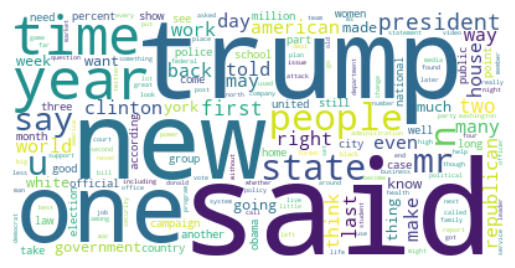

In [18]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations=False).generate(' '.join(news_dataset['keyphrases']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

A sample of 10,000 objects is selected, and from each row, the keyphrases are extracted. From these keyphrases, we will identify named entities (like names of people or places) using spacy. Then, it creates two strings, one containing all the identified entities and another with their corresponding labels. After that, we generate word clouds for both the entities and labels.

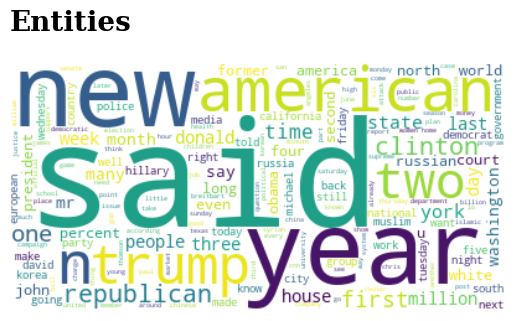

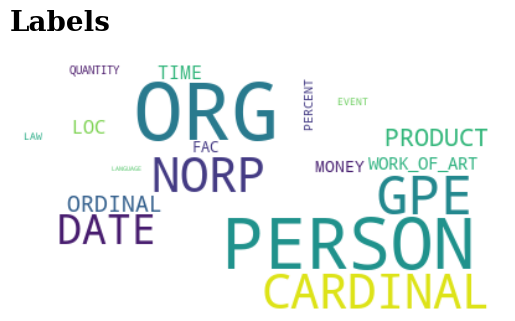

In [53]:
# select a sample of 10000 rows
news_content = news_dataset.sample(n=10000)['keyphrases']

all_entities = []
all_labels = []

# collect all entities and labels
for text in news_content:
    # Apply NER
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    labels = [ent.label_ for ent in doc.ents]
    all_labels.extend(labels)
    all_entities.extend(entities)

entity_string = ' '.join(all_entities)
labels_string = ' '.join(all_labels)

# create wordclouds
wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations=False).generate(entity_string)

plt.title('Entities', fontsize=20, fontweight='bold', pad=20, loc='left', color='black', fontfamily='serif', y=1.02)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations=False).generate(labels_string)

plt.title('Labels', fontsize=20, fontweight='bold', pad=20, loc='left', color='black', fontfamily='serif', y=1.02)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Characterization

In [54]:
news_dataset_analysis = news_dataset.copy()

#### Pie Charts

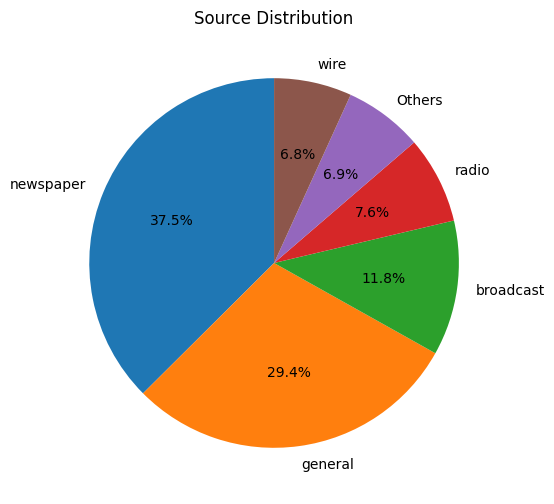

In [55]:
# Pie chart for Source distribution
source_counts = news_dataset_analysis['source'].value_counts()
threshold = 0.05  # Define a threshold for combining into 'Others'
small_sources = source_counts[source_counts / source_counts.sum() < threshold].index
news_dataset_analysis['source'] = news_dataset_analysis['source'].apply(lambda x: 'Others' if x in small_sources else x)
source_counts = news_dataset_analysis['source'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Source Distribution")
plt.show()

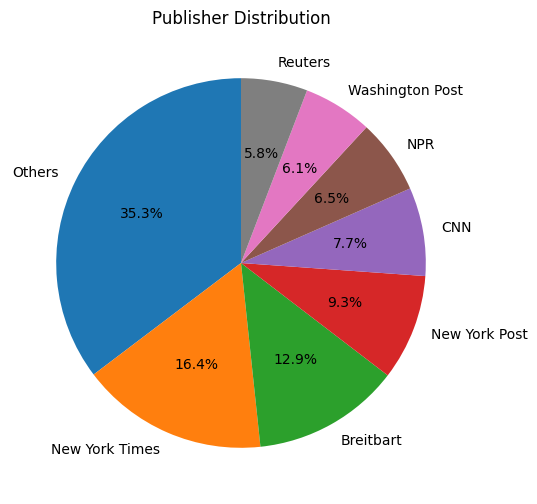

In [56]:
# Pie chart for Publisher distribution
publisher_counts = news_dataset_analysis['publisher'].value_counts()
small_publishers = publisher_counts[publisher_counts / publisher_counts.sum() < threshold].index
news_dataset_analysis['publisher'] = news_dataset_analysis['publisher'].apply(lambda x: 'Others' if x in small_publishers else x)
publisher_counts = news_dataset_analysis['publisher'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(publisher_counts, labels=publisher_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Publisher Distribution")
plt.show()

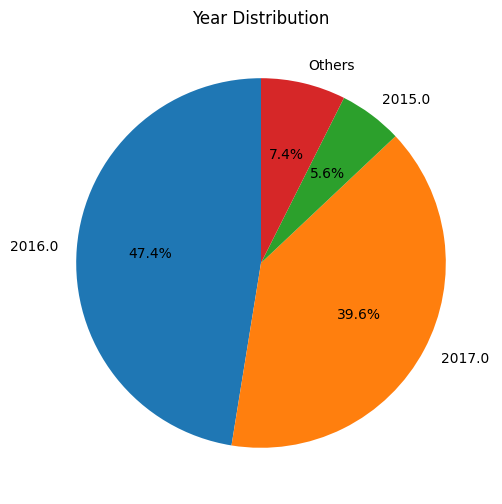

In [57]:
# Pie chart for Year distribution
def extract_year(date_str):
    try:
        return int(date_str.split('-')[0])
    except:
        return None

news_dataset_analysis['year'] = news_dataset_analysis['date'].apply(extract_year)

df = news_dataset_analysis.dropna(subset=['year'])
year_counts = df['year'].value_counts()

threshold = 0.03  # Adjust the threshold as needed
small_years = year_counts[year_counts / year_counts.sum() < threshold].index
year_counts.loc['Others'] = year_counts[small_years].sum()
year_counts.drop(small_years, inplace=True)

plt.figure(figsize=(6, 6))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Year Distribution")
plt.show()

#### Histograms

In [58]:
news_dataset_analysis['article_length'] = news_dataset_analysis['content'].apply(len)

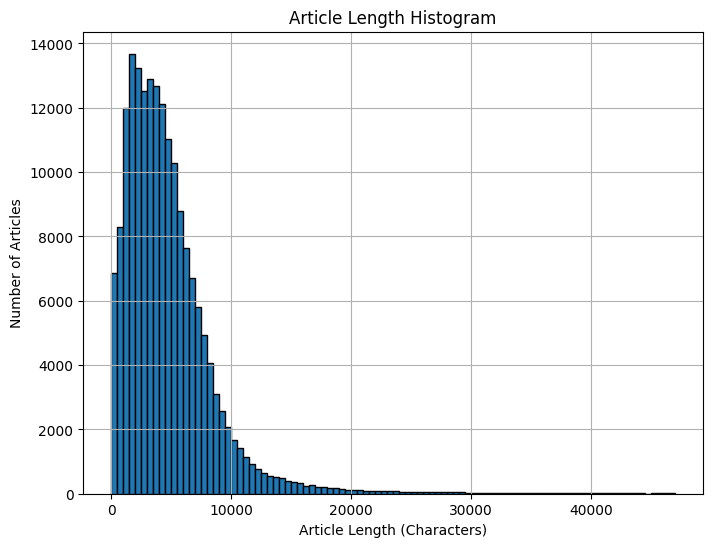

In [76]:
bin_edges = [form * 500 for form in range(0, 95)]

# Create a histogram of article lengths
plt.figure(figsize=(8, 6))
plt.hist(news_dataset_analysis['article_length'], bins=bin_edges, edgecolor='k')
plt.xlabel('Article Length (Characters)')
plt.ylabel('Number of Articles')
plt.title('Article Length Histogram')
plt.grid(True)
plt.show()

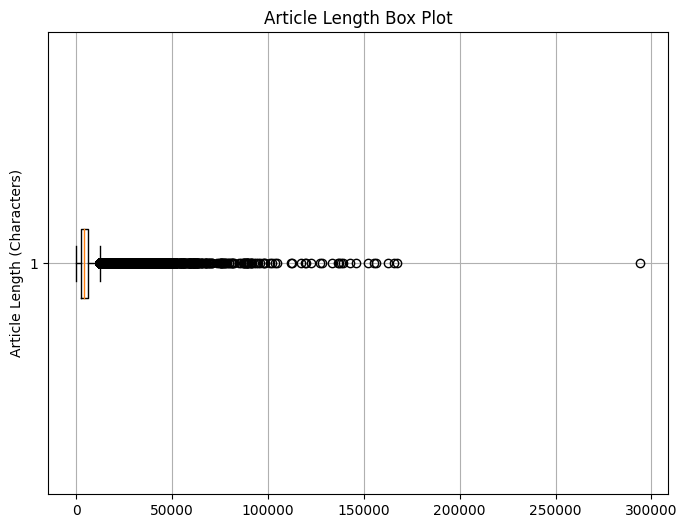

In [60]:
# Create a box plot of article lengths
plt.figure(figsize=(8, 6))
plt.boxplot(news_dataset_analysis['article_length'], vert=False)
plt.ylabel('Article Length (Characters)')
plt.title('Article Length Box Plot')
plt.grid(True)
plt.show()

#### Heatmaps

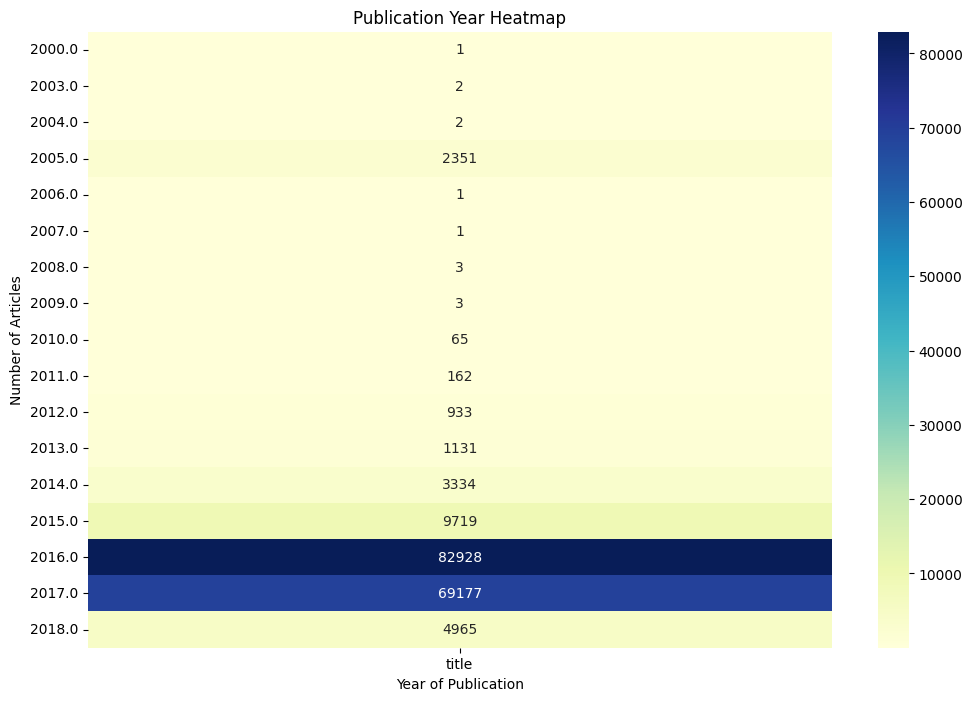

In [62]:
import seaborn as sns

news_dataset_analysis['year'] = news_dataset_analysis['date'].apply(extract_year)
df = news_dataset_analysis.dropna(subset=['year'])
year_counts = df['year'].value_counts()

heatmap_data = df.pivot_table(index='year', values='title', aggfunc='count')

# Create the heatmap no analyse the number of articles published each year
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Year of Publication')
plt.ylabel('Number of Articles')
plt.title('Publication Year Heatmap')
plt.show()


#### Scatter Plots

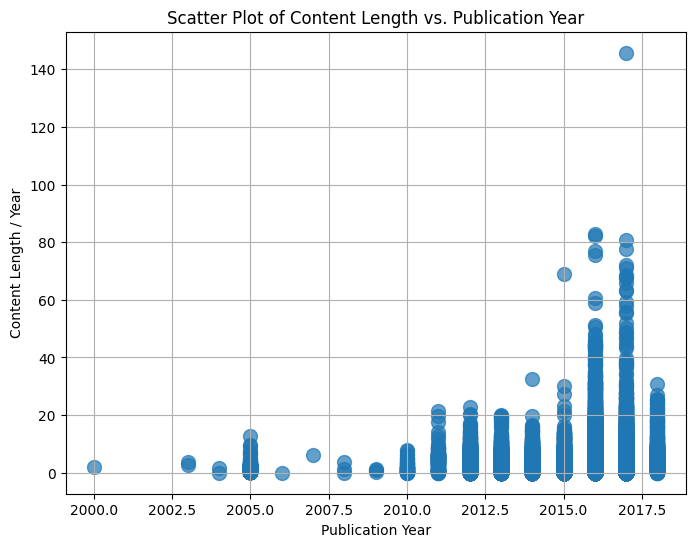

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

aux_df = news_dataset_analysis.copy()

# Extract the year of publication
aux_df['year'] = pd.to_datetime(aux_df['date']).dt.year

# Calculate the ratio of content length to publication date
aux_df['content_length'] = aux_df['content'].apply(len)
aux_df['ratio'] = aux_df['content_length'] / aux_df['year']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(aux_df['year'], aux_df['ratio'], s=100, alpha=0.7)
plt.xlabel('Publication Year')
plt.ylabel('Content Length / Year')
plt.title('Scatter Plot of Content Length vs. Publication Year')
plt.grid(True)
plt.show()
